Algoritmo para tentar prever os valores das casas do dataset - California Houses via Kaggle

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('housing.csv')

In [109]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [111]:
df.dropna(inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Dividir os dados em treino e teste 

In [113]:
from sklearn.model_selection import train_test_split
X = df.drop(['median_house_value'],axis = 1)
y = df['median_house_value']
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


Usado 20 %

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [115]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17105,-122.22,37.46,13.0,2888.0,546.0,1182.0,504.0,6.0255,NEAR OCEAN,409300.0
5695,-118.25,34.23,34.0,2421.0,475.0,1232.0,454.0,4.6852,<1H OCEAN,296200.0
18160,-122.04,37.35,20.0,2016.0,313.0,767.0,310.0,6.8370,<1H OCEAN,383000.0
11557,-117.98,33.73,22.0,4232.0,624.0,2408.0,660.0,6.6539,<1H OCEAN,284900.0
569,-122.25,37.74,25.0,1914.0,365.0,897.0,390.0,4.4562,NEAR BAY,206200.0
...,...,...,...,...,...,...,...,...,...,...
10759,-117.87,33.63,9.0,6163.0,1004.0,1912.0,903.0,10.8289,<1H OCEAN,500001.0
10551,-117.71,33.65,16.0,3774.0,456.0,1587.0,430.0,8.6088,<1H OCEAN,307400.0
19325,-122.94,38.53,49.0,1141.0,239.0,505.0,184.0,3.7143,<1H OCEAN,148800.0
18148,-122.04,37.34,25.0,1994.0,287.0,704.0,283.0,7.7799,<1H OCEAN,447300.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

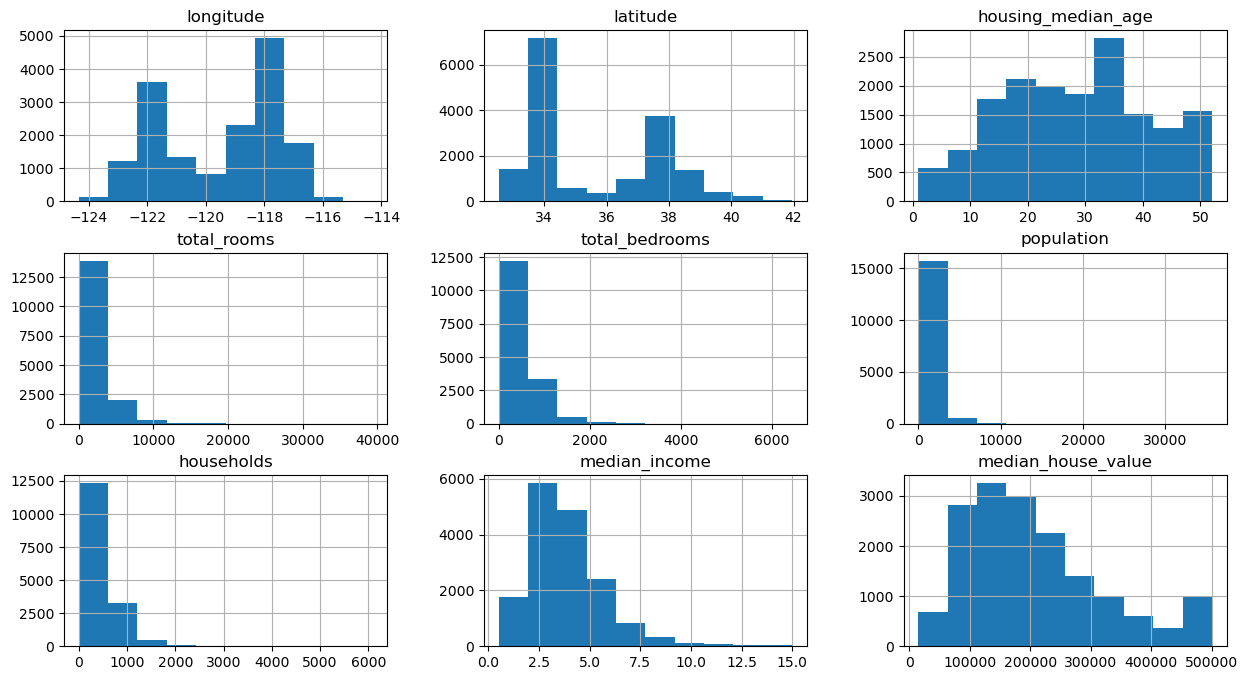

In [116]:
train_data.hist(figsize=(15,8))

Correlacionar

In [117]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924354,-0.107977,0.042220,0.064844,0.094382,0.050595,-0.011073,-0.046316
latitude,-0.924354,1.000000,0.010133,-0.034333,-0.063285,-0.105111,-0.067930,-0.082920,-0.143685
housing_median_age,-0.107977,0.010133,1.000000,-0.354699,-0.314721,-0.288197,-0.296400,-0.125309,0.105121
total_rooms,0.042220,-0.034333,-0.354699,1.000000,0.931041,0.855277,0.918698,0.202328,0.135231
total_bedrooms,0.064844,-0.063285,-0.314721,0.931041,1.000000,0.875270,0.978605,-0.003662,0.051454
population,0.094382,-0.105111,-0.288197,0.855277,0.875270,1.000000,0.906353,0.009116,-0.023600
households,0.050595,-0.067930,-0.296400,0.918698,0.978605,0.906353,1.000000,0.017590,0.067377
median_income,-0.011073,-0.082920,-0.125309,0.202328,-0.003662,0.009116,0.017590,1.000000,0.686477
median_house_value,-0.046316,-0.143685,0.105121,0.135231,0.051454,-0.023600,0.067377,0.686477,1.000000


N sei sdasff

<AxesSubplot:>

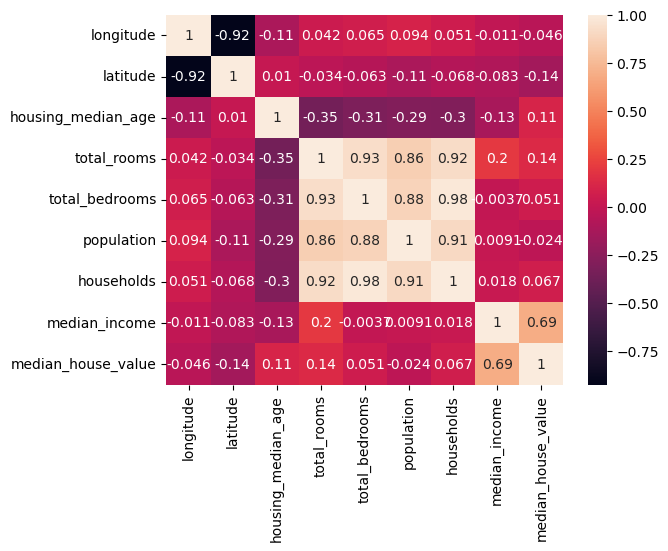

In [118]:
sns.heatmap(train_data.corr(),annot=True)

In [119]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

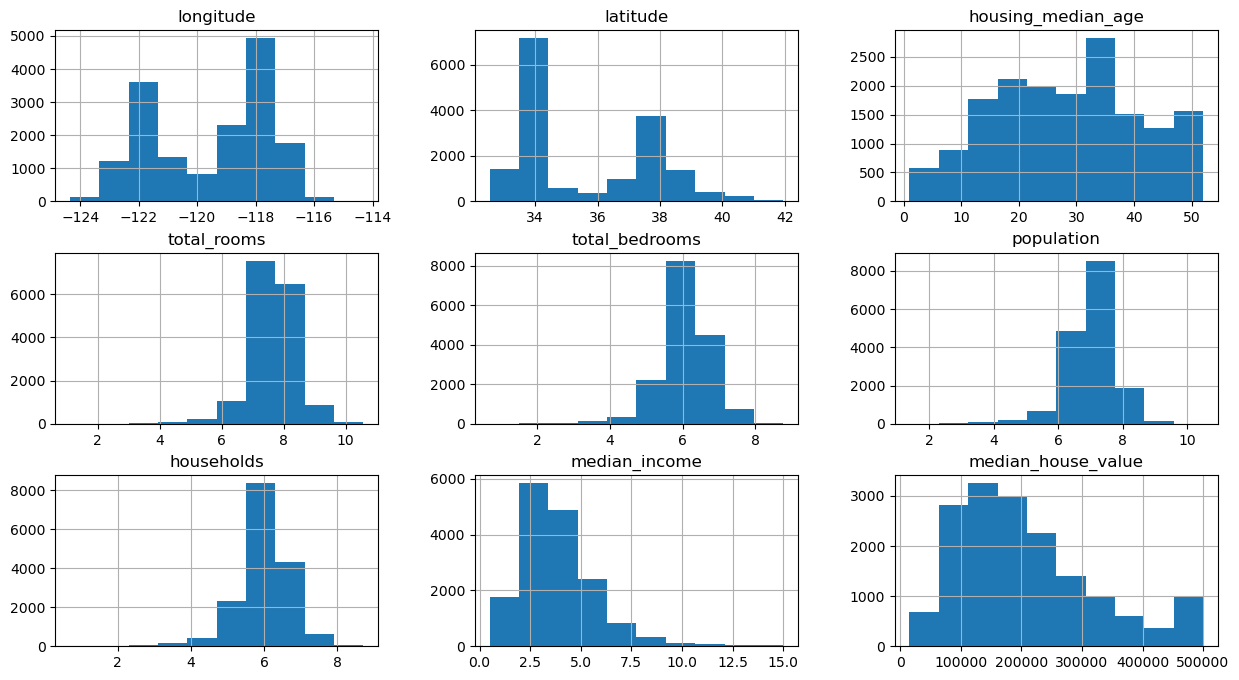

In [120]:
train_data.hist(figsize=(15,8))

Devido a proximidade a costa o valor da casa é alterado

In [121]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7249
INLAND        5156
NEAR OCEAN    2112
NEAR BAY      1825
ISLAND           4
Name: ocean_proximity, dtype: int64

In [122]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

<AxesSubplot:>

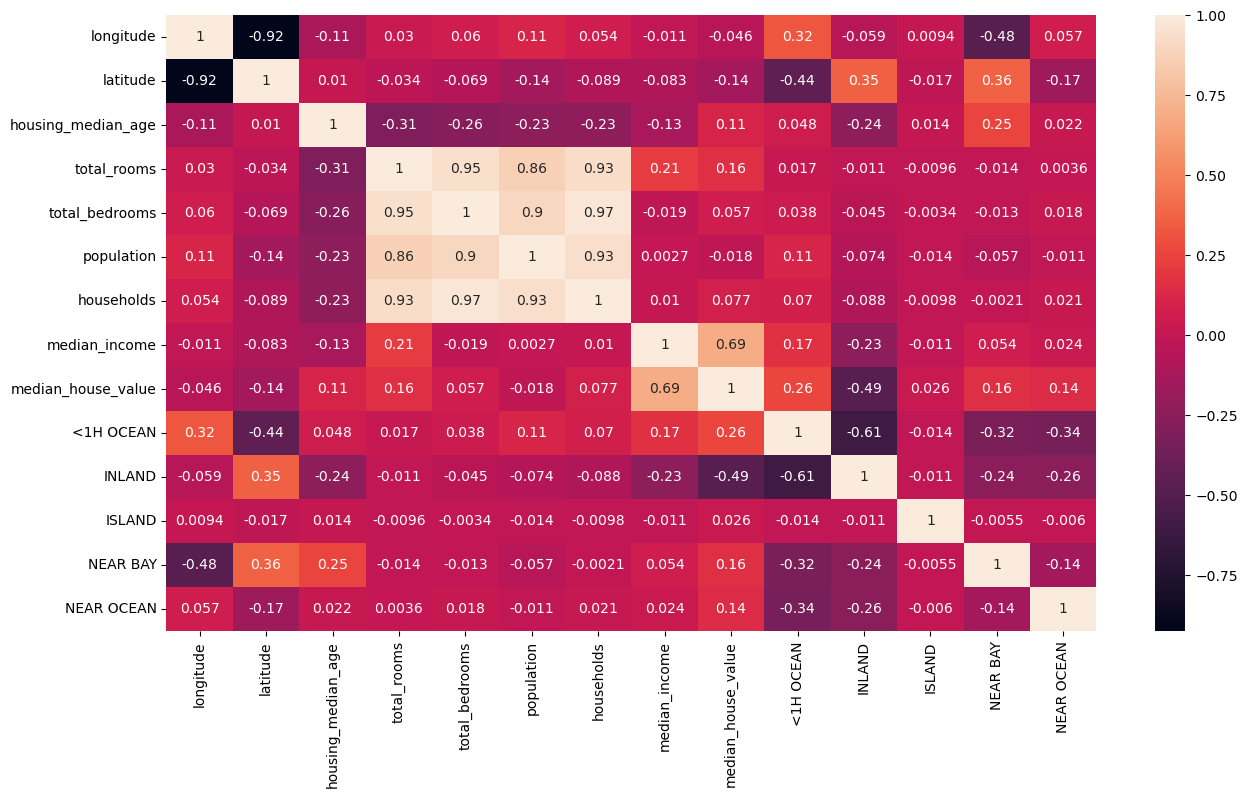

In [123]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

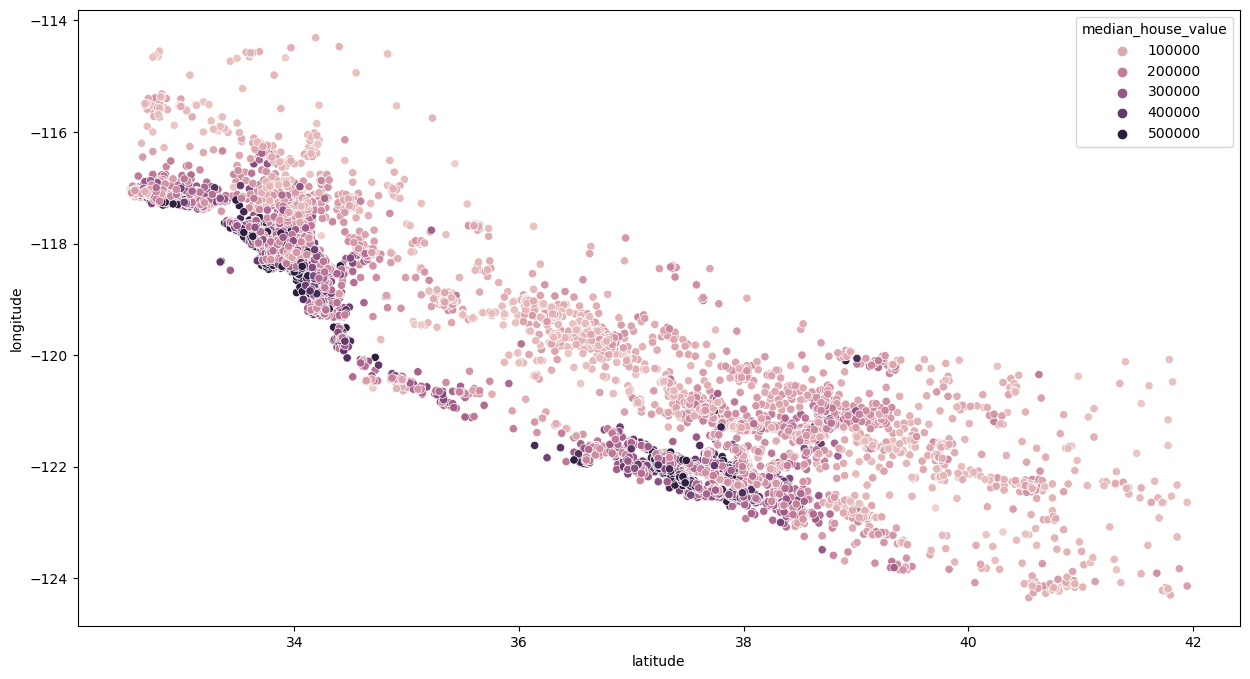

In [124]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value')

Mais perto da costa as casas a média do valor das casas é mais alto

In [125]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['households'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

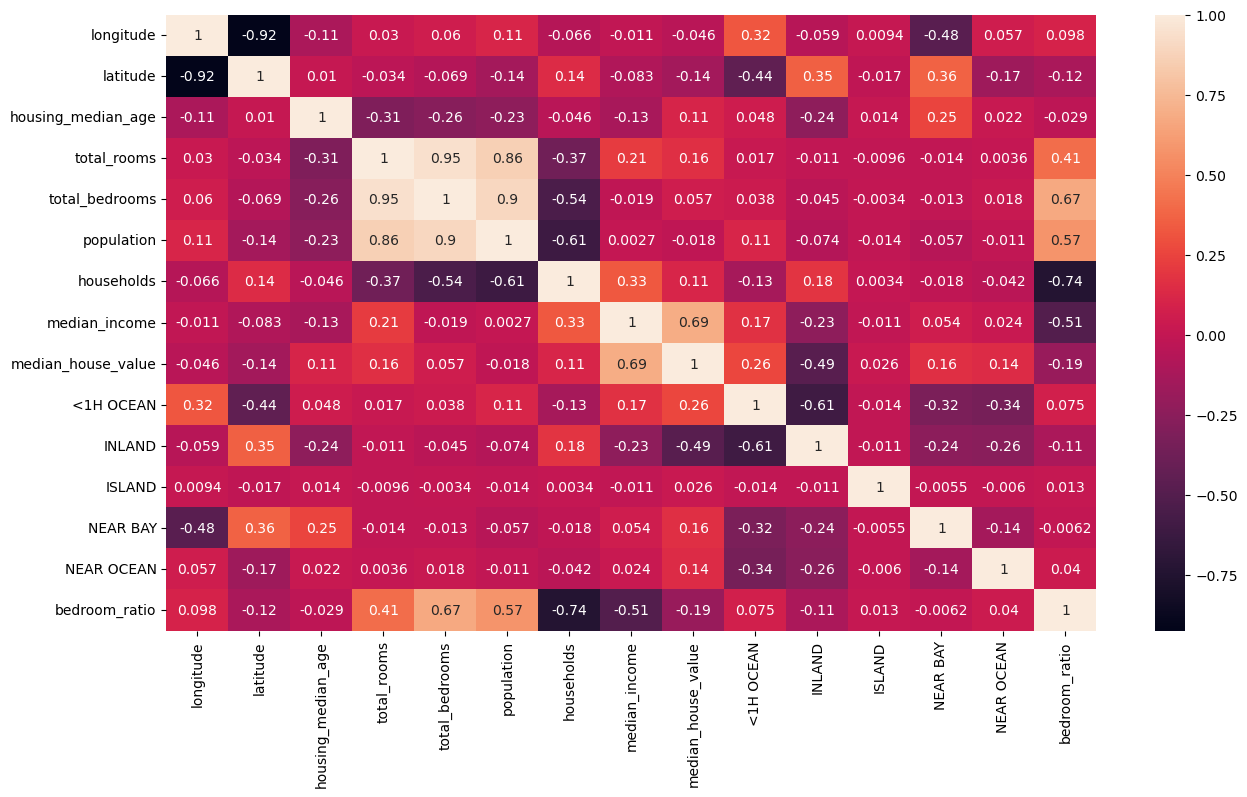

In [126]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

Realizar regressão linear

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train,y_train = train_data.drop(['median_house_value'],axis= 1),train_data['median_house_value']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [128]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['households'] = test_data['total_rooms']/test_data['households']



In [129]:
X_test,y_test = test_data.drop(['median_house_value'],axis= 1),test_data['median_house_value']

_______________tentativa de ajuste_______________


In [130]:
X_test_s = scaler.transform(X_test)

-------------------

In [131]:
reg.score(X_test,y_test)

c:\Users\leite\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2210.980921667399

In [132]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.8181073760697353

In [133]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid ={
    "n_estimators":[100,200,300],
    "min_samples_split":[2,8],
    "max_depth":[None,4,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [134]:
best_forest = grid_search.best_estimator_

In [135]:
best_forest.score(X_test_s,y_test)

0.8200709615654986

In [136]:
grid_search.best_estimator_.score(X_test_s,y_test)

0.8200709615654986